In [21]:
#pip install pydotplus
pip install seaborn

SyntaxError: invalid syntax (3149992830.py, line 2)

In [2]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

from pandas import Series, DataFrame
import pandas as pd

HR_df = pd.read_csv('DSP_Project_Data.csv')

HR_df

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,8,2,9.0,2,6,0,4,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,8,1,10.0,5,3,0,2,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,8,0,10.0,2,3,0,2,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,8,0,5.0,4,4,1,2,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,8,1,10.0,2,9,7,8,4.0,1.0,3.0


In [3]:
# drop rows with mssing values, most rows do not have NA values
HR_df.dropna(inplace=True)

# change attrition to numerical
attrition_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the 'Attrition' column
HR_df['Attrition'] = HR_df['Attrition'].map(attrition_mapping)
HR_df

# apply mapping to the 'Gender' column 
gender_mapping = {'Male': 1, 'Female': 0}
HR_df['Gender'] = HR_df['Gender'].map(gender_mapping)
#HR_df

# droppping some columns that we think are not important/not variables of interest
HR_df.drop(['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeID'], axis=1, inplace=True)


In [17]:
HR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   Attrition                4300 non-null   int64  
 2   BusinessTravel           4300 non-null   object 
 3   Department               4300 non-null   object 
 4   DistanceFromHome         4300 non-null   int64  
 5   Education                4300 non-null   int64  
 6   EducationField           4300 non-null   object 
 7   Gender                   4300 non-null   int64  
 8   JobLevel                 4300 non-null   int64  
 9   JobRole                  4300 non-null   object 
 10  MaritalStatus            4300 non-null   object 
 11  MonthlyIncome            4300 non-null   int64  
 12  NumCompaniesWorked       4300 non-null   float64
 13  PercentSalaryHike        4300 non-null   int64  
 14  StockOptionLevel        

# Classification Tree model

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()
HR_df['Attrition'] = label_encoder.fit_transform(HR_df['Attrition'])

# Separating the predictor variables and target variable
X = HR_df.drop(columns=['Attrition'])
y = HR_df['Attrition']

# Transforming the character variables
cat_columns = X.select_dtypes(include=['object']).columns
for col in cat_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Spliting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training the classification tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9872093023255814


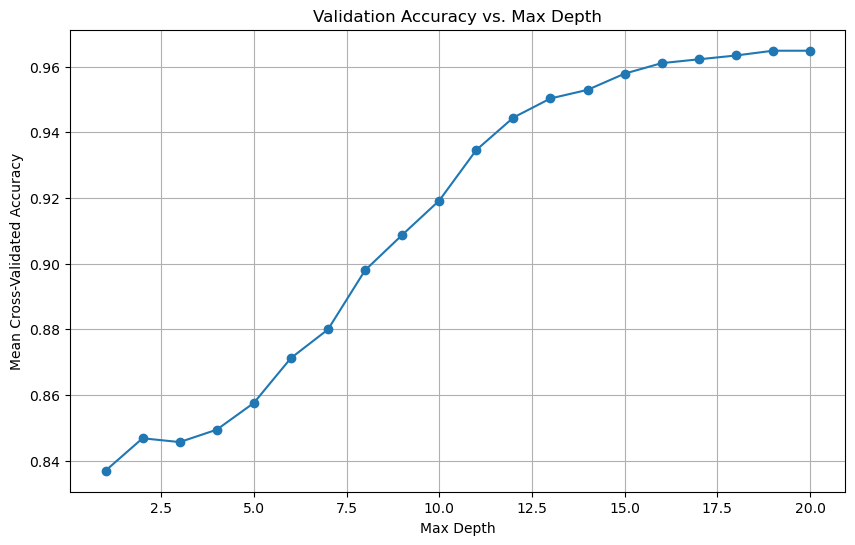

Accuracy on the test set: 0.9872093023255814
Precision: 0.9459459459459459
Recall: 0.9790209790209791


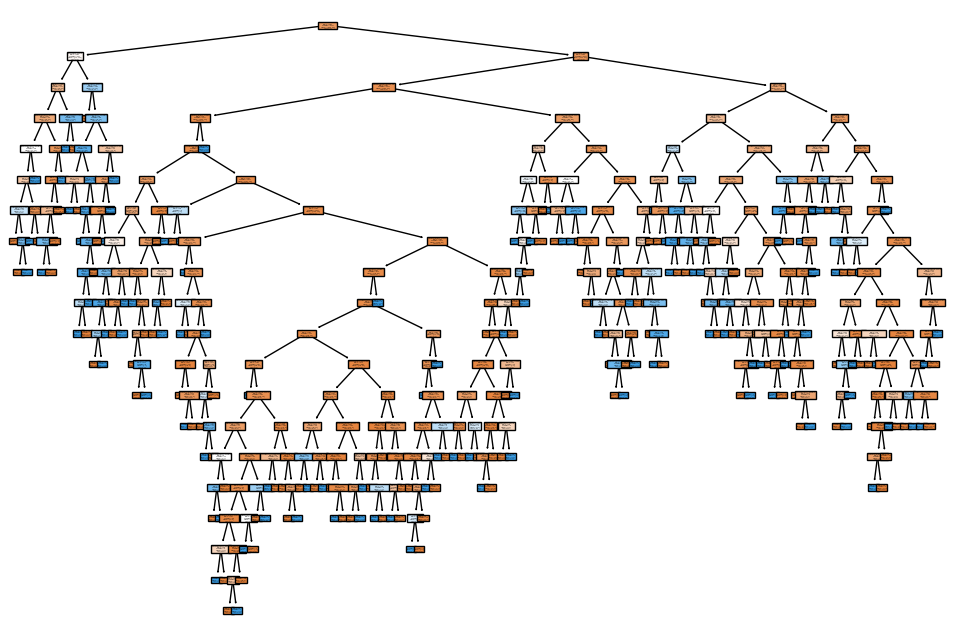

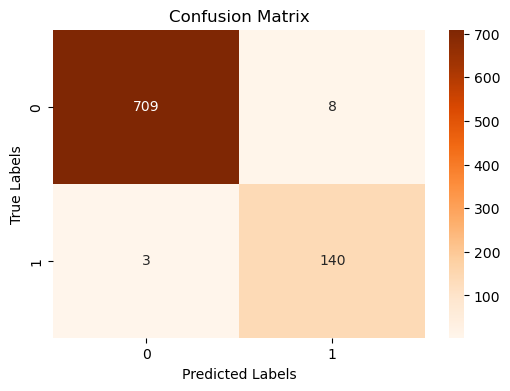

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns



# Building and training the classification tree with all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical variables using one-hot encoding
cat_columns = X.select_dtypes(include=['object']).columns
for col in cat_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

# List to store cross-validated accuracy for different max_depth values
max_depth_values = range(1, 21)
mean_cv_accuracy_values = []

# Calculate cross-validated accuracy for each max_depth value
for depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    mean_cv_accuracy = np.mean(cv_scores)
    mean_cv_accuracy_values.append(mean_cv_accuracy)

# Plotting the graph between validation accuracy and max depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_cv_accuracy_values, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Validation Accuracy vs. Max Depth')
plt.grid(True)
plt.show()

# Building the final model with the best max_depth
best_max_depth = max_depth_values[np.argmax(mean_cv_accuracy_values)]
final_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
final_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = final_model.predict(X_test)

# Calculating the accuracy of the final model on the test set
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy_test)

# Calculating precision and recall for the final model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

# Plotting the final decision tree
plt.figure(figsize=(12, 8))
plot_tree(final_model, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
#plt.show()

# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with orange shading using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [22]:
#import seaborn as sns
